In [ ]:
import sys
import os
import random
sys.path.append(os.path.abspath(".."))

from pathlib import Path
import torchaudio

from ml.data.data_util import create_spectrogram, get_number_of_fourier_transform_bins, create_mel_spectrogram
from ml.data.vision import show_and_save_spectrogram_image, plot_fourier_transform, plot_waveform, show_mel_spectrogram
from ml.data.vision import visualize_transform

/home/dlonghi1_jm/Projects/plant_emotion_classification/venv/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


# Sine wave: waveform, fourier transform and spectrogram

In [2]:
path = Path.home() / '.data/sinewave.wav'
waveform, sample_rate = torchaudio.load(path)

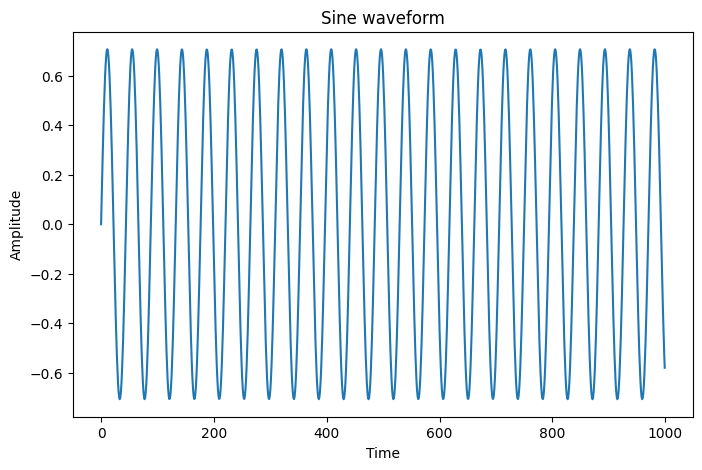

In [3]:
plot_waveform(waveform)

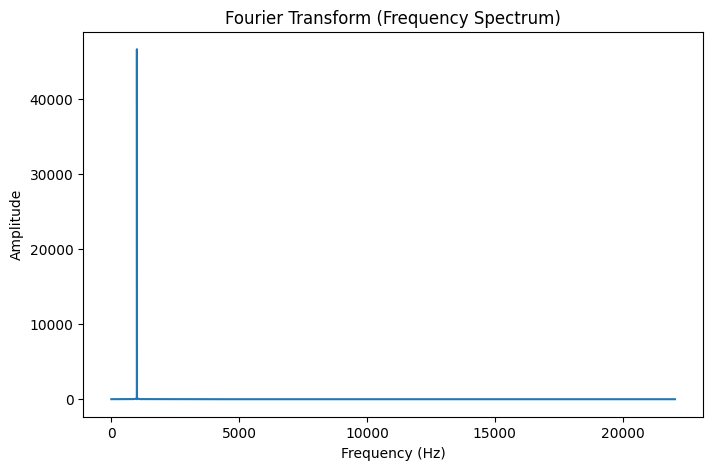

In [4]:
plot_fourier_transform(waveform, sample_rate)

## Visualize some spectrograms

In [4]:
base_file_path = Path.home() / '.data/petal/pre-labeled/audio'
angry = 'angry/'
disgusted = 'disgusted/'
fearful = 'fearful/'
happy = 'happy/'
neutral = 'neutral/'
sad = 'sad/'
surprised = 'surprised/'

In [5]:
def get_random_files(directory: Path, num_files: int = 5):
    directory_path = Path(directory)
    
    if not directory_path.is_dir():
        raise ValueError(f"{directory} is not a valid directory")
    
    all_files = [file for file in directory_path.iterdir() if file.is_file()]
    
    if len(all_files) < num_files:
        raise ValueError(f"Not enough files in the directory. Found {len(all_files)}, needed {num_files}")
    
    return random.sample(all_files, num_files)

In [6]:
file_paths = []
file_paths += get_random_files(base_file_path / angry)
file_paths += get_random_files(base_file_path / disgusted)
file_paths += get_random_files(base_file_path / fearful)
file_paths += get_random_files(base_file_path / happy)
file_paths += get_random_files(base_file_path / neutral)
file_paths += get_random_files(base_file_path / sad)
file_paths += get_random_files(base_file_path / surprised)

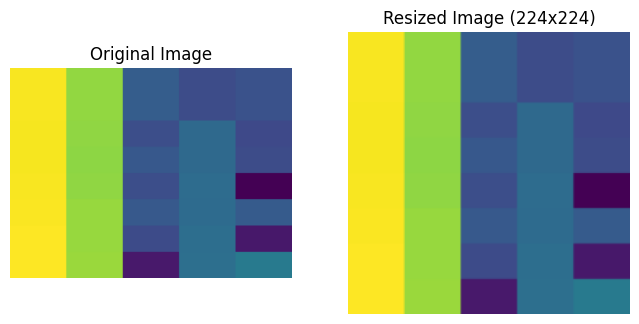

In [7]:
from torchvision import transforms
visualize_transform(
    image_path=Path.home() / '.data/petal/pre-labeled/spectrograms/angry/spec_img0.png',
    transform=transforms.Resize((224, 224))
)

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/31_manuel_basilikum1_150hz_1738756862971.0_60.wav--------------------------


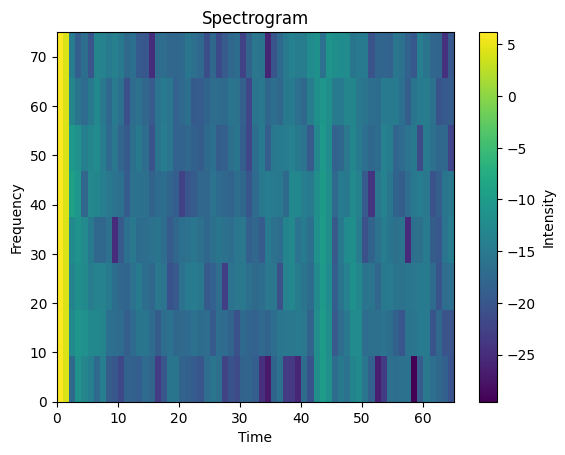

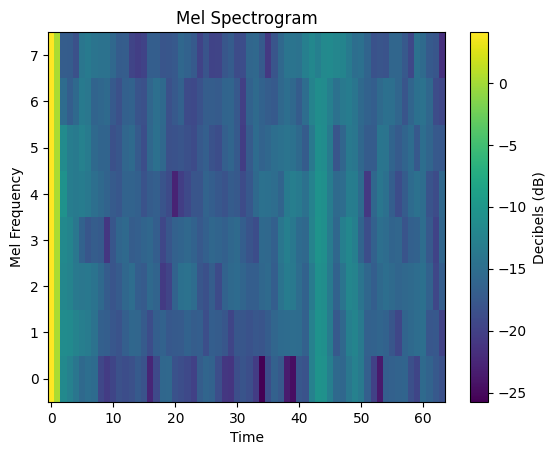

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/31_manuel_basilikum1_150hz_1738756942768.0_93.wav--------------------------


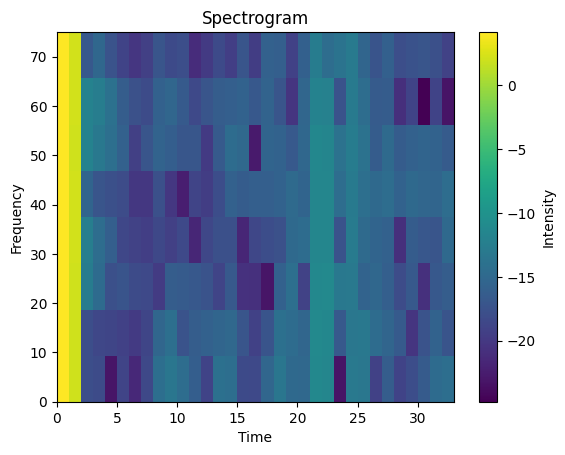

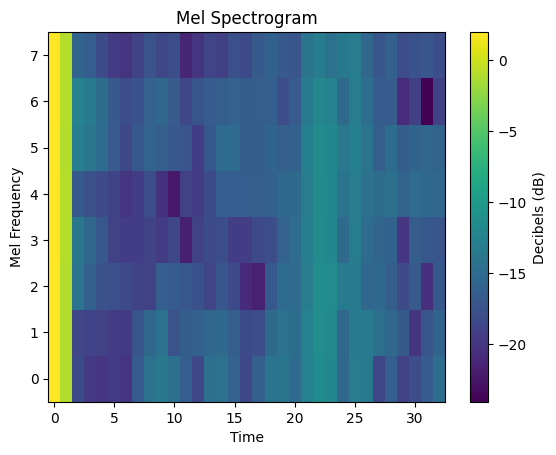

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/basilikum_142hz_1738520880850_6_90.wav--------------------------


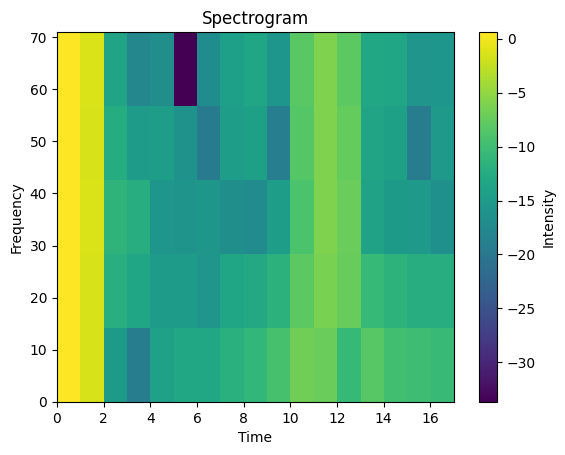

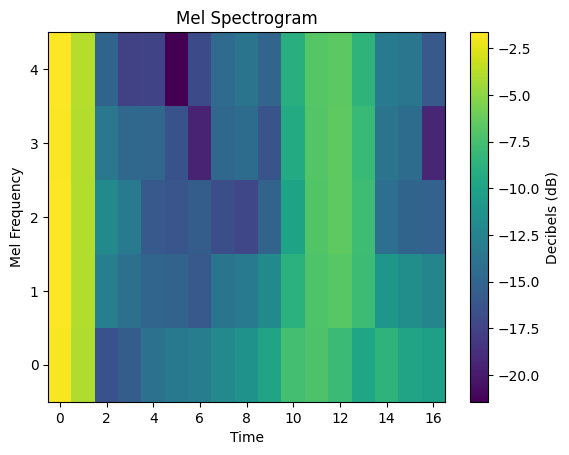

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/basilikum_142hz_1738520880850_6_34.wav--------------------------


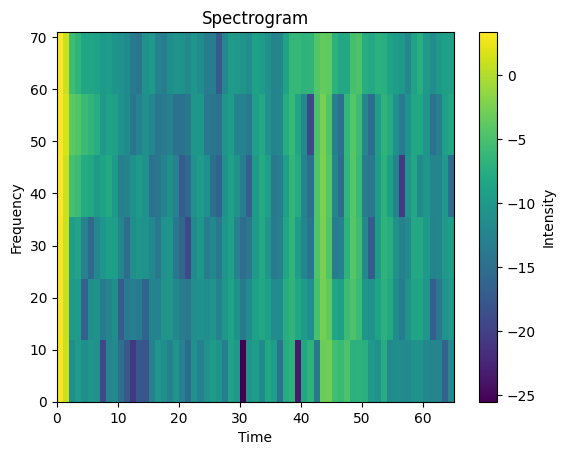

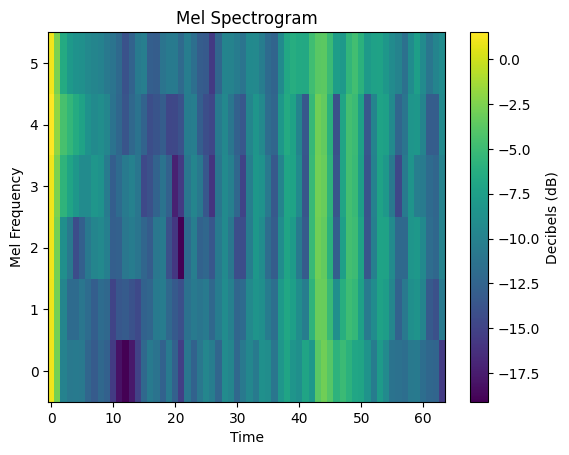

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/angry/60_jasmin_basilikum_142hz_1739448494433.0_132.wav--------------------------


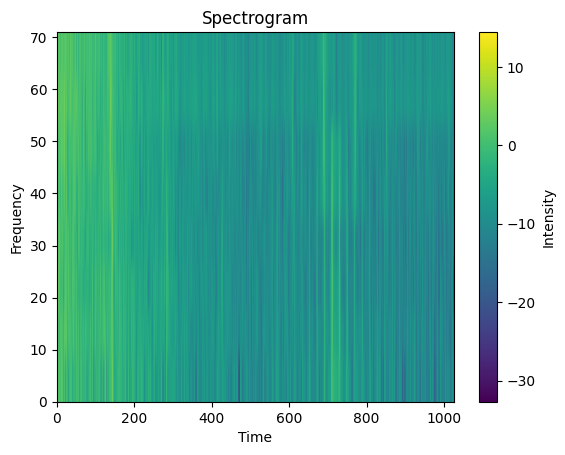

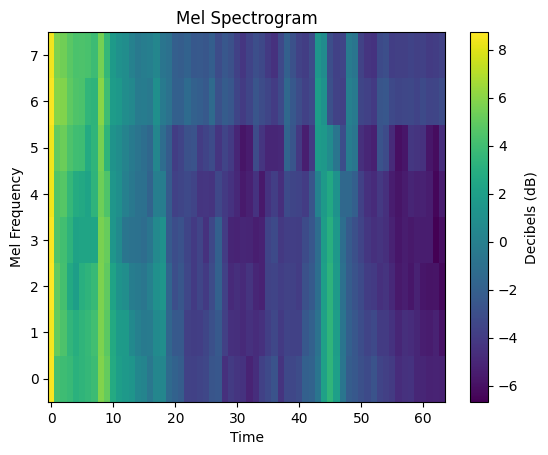

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/32_anna_basilikum1_142hz_1738757760982.0_41.wav--------------------------


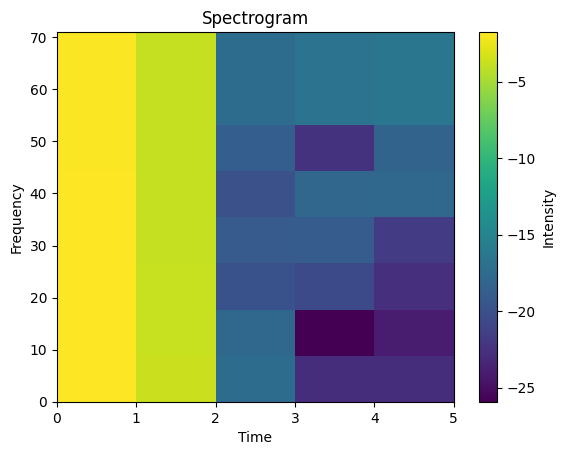

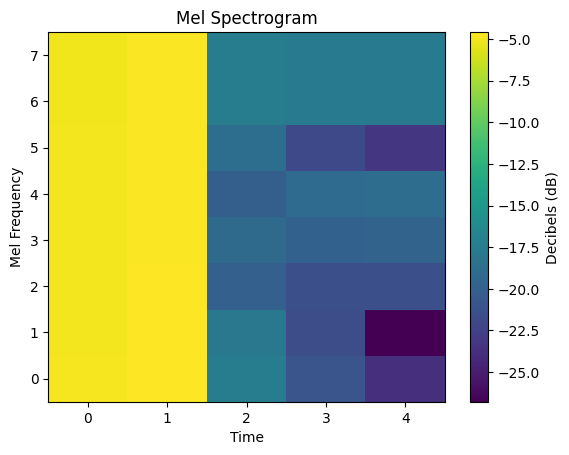

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/17_william_basilikum_142hz_1738688206512.0_10.wav--------------------------


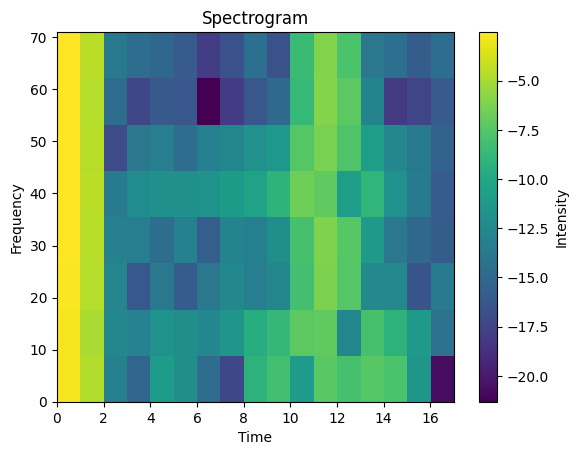

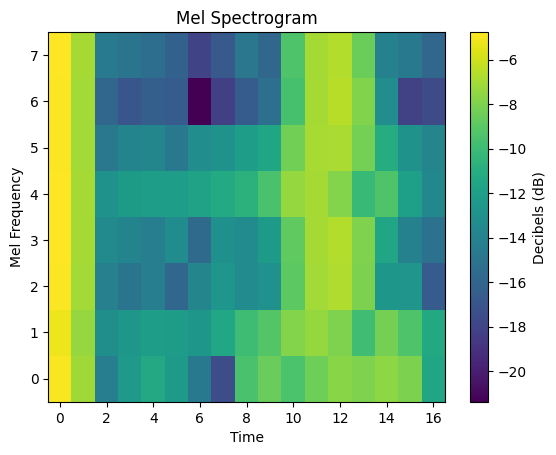

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/55_maurice_basilikum_142hz_1739441031146.0_5.wav--------------------------


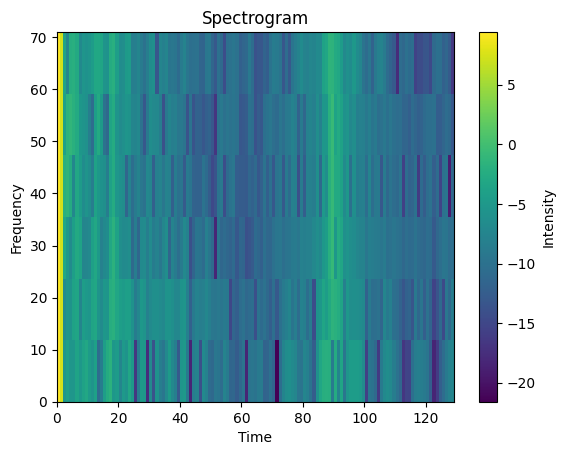

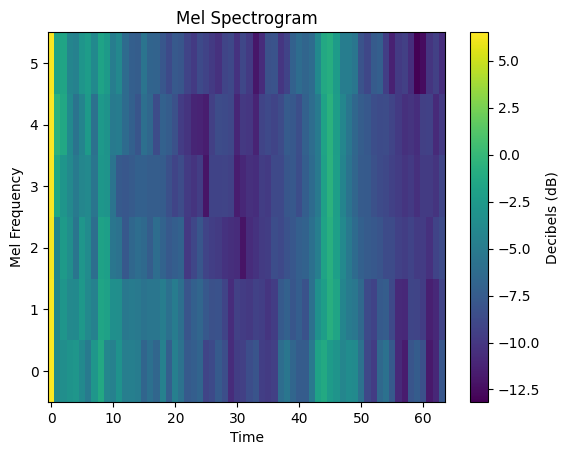

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/64_anna_basilikum_142hz_1739458146441.0_89.wav--------------------------


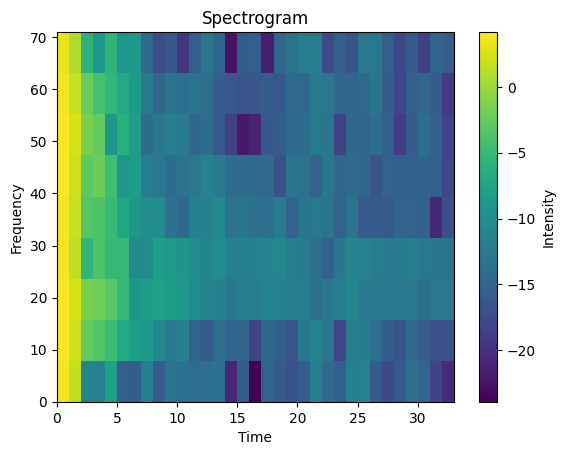

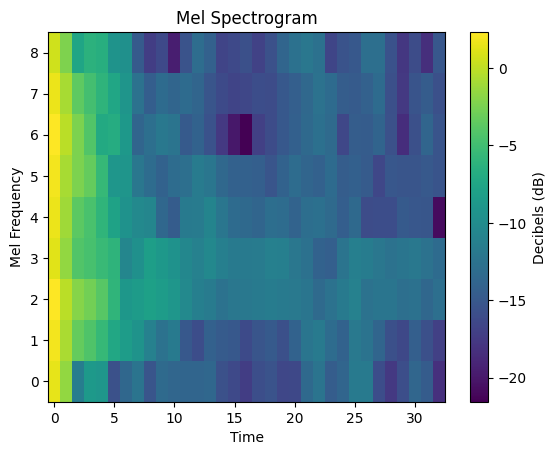

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/disgusted/32_anna_basilikum1_142hz_1738757734682.0_33.wav--------------------------


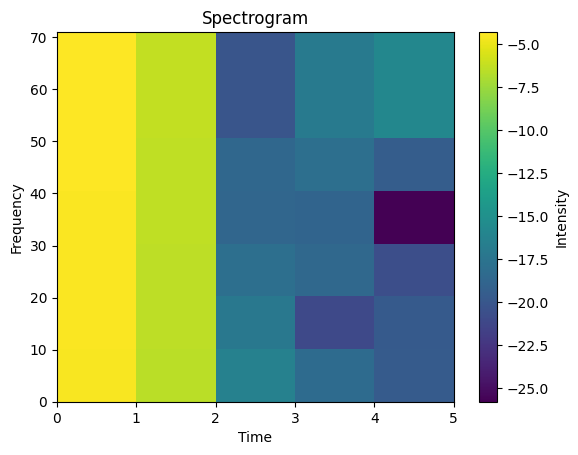

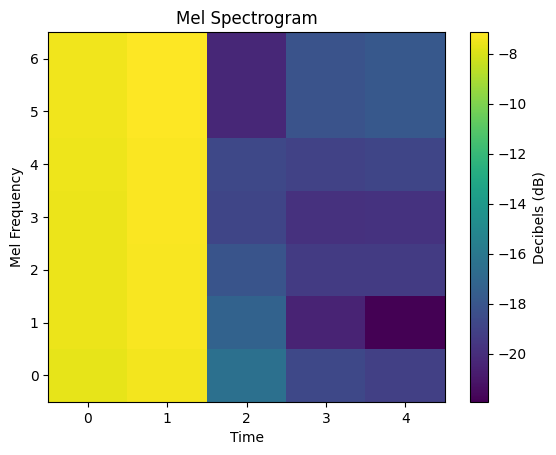

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/10_dreimasterblume_3mast_142hz_1738664042818.0_242.wav--------------------------


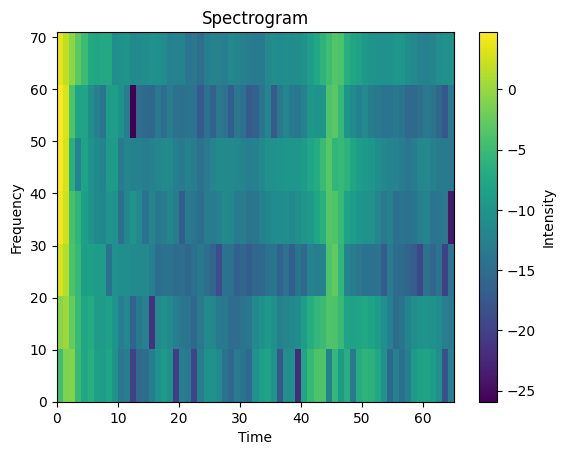

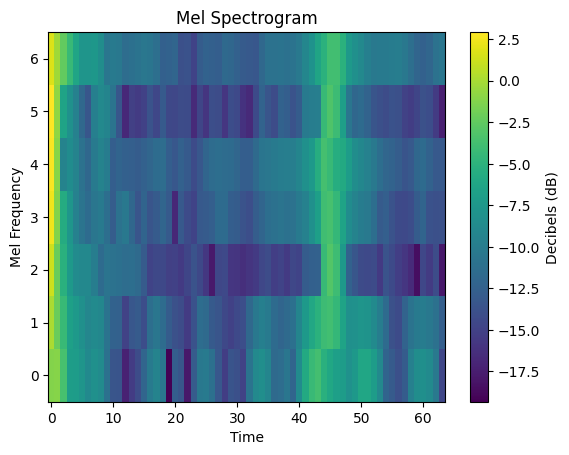

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/10_dreimasterblume_3mast_142hz_1738664094969.0_293.wav--------------------------


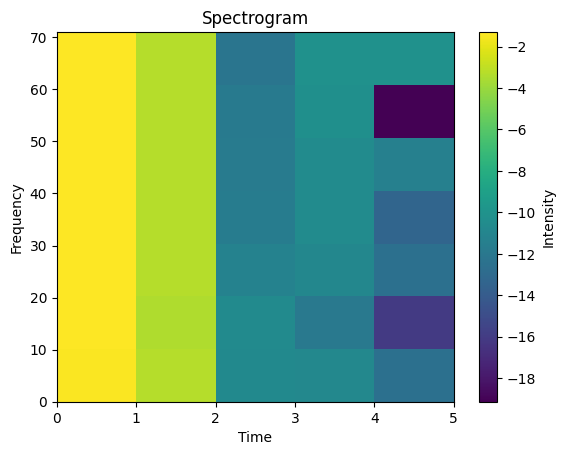

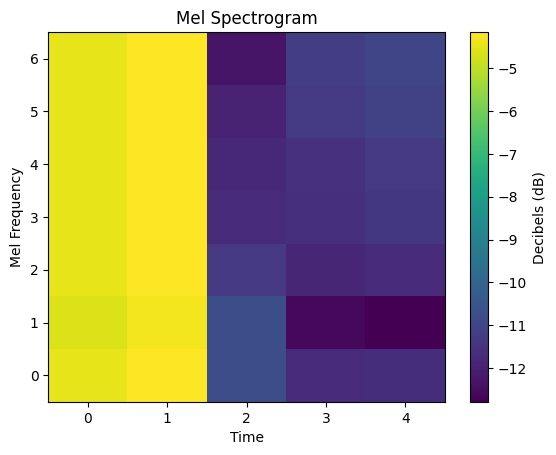

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/60_jasmin_basilikum_142hz_1739448093238.0_43.wav--------------------------


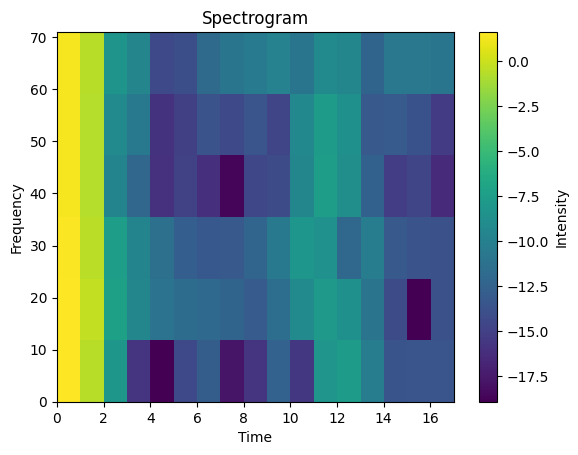

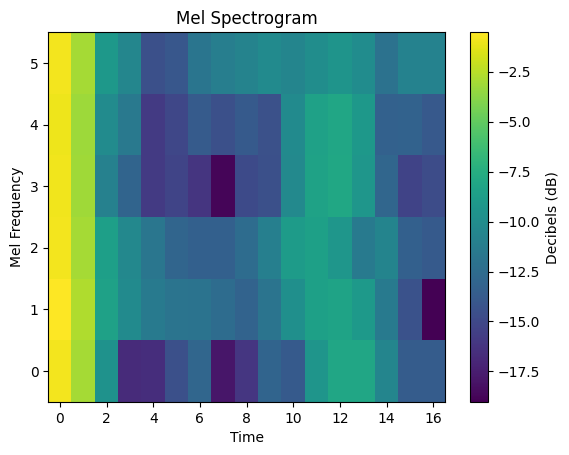

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/10_dreimasterblume_3mast_142hz_1738664031583.0_238.wav--------------------------


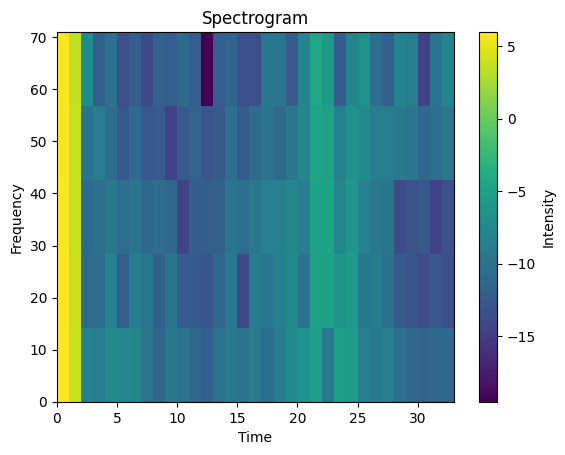

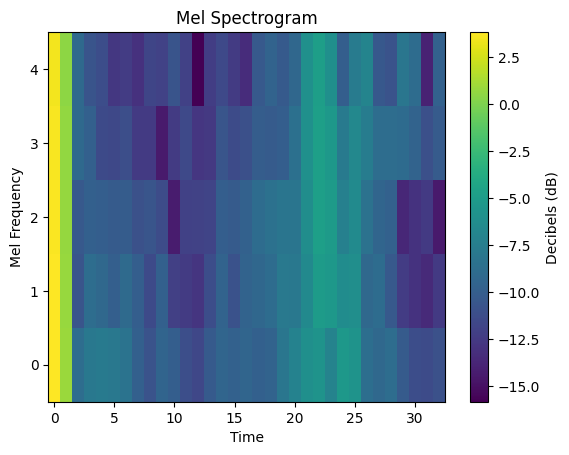

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/fearful/17_william_basilikum_142hz_1738688303632.0_36.wav--------------------------


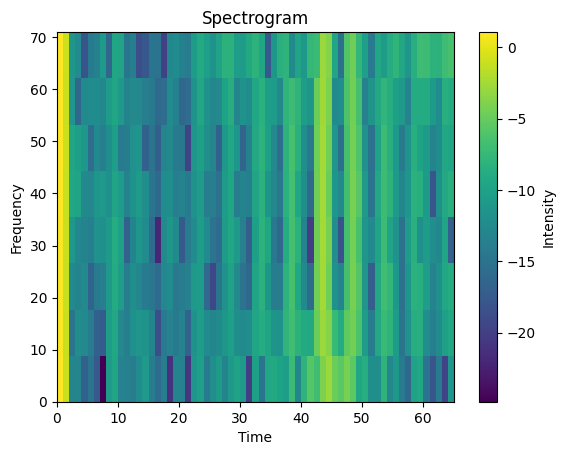

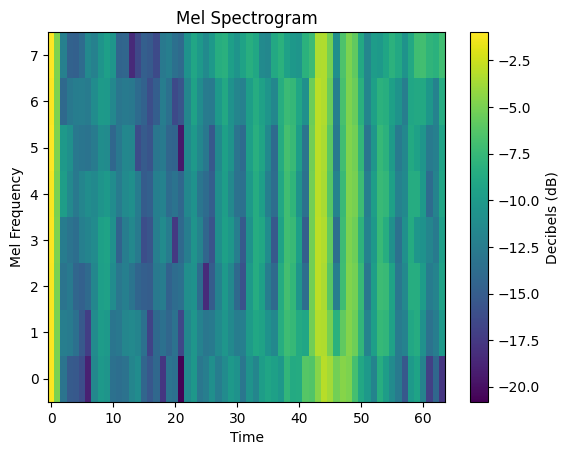

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/13_johannes_basilikum_142hz_1738683653260.0_27.wav--------------------------


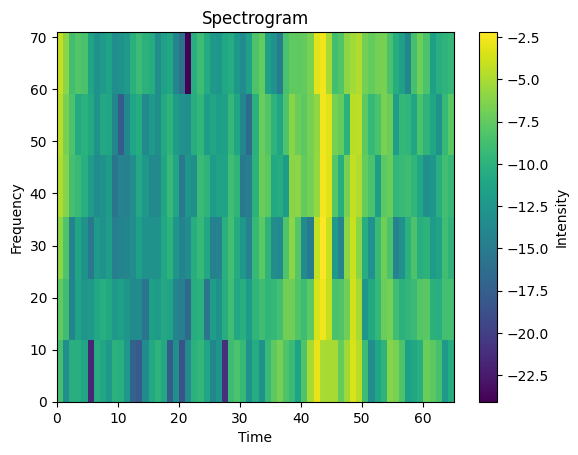

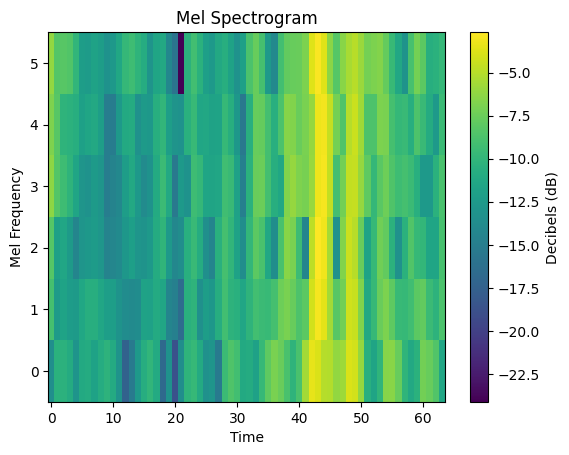

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/55_maurice_basilikum_142hz_1739441045399.0_11.wav--------------------------


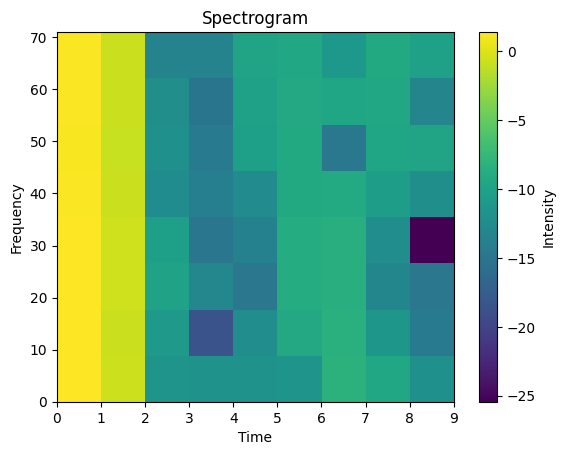

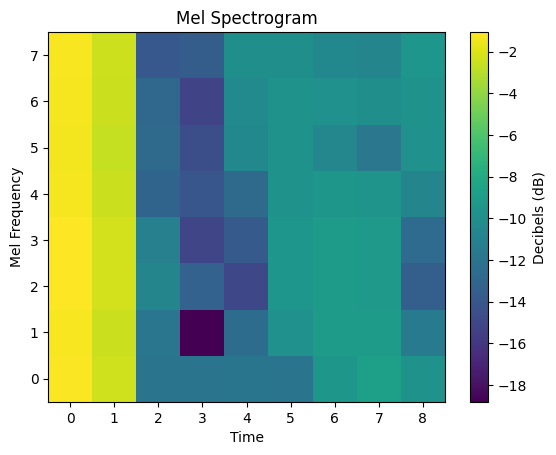

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/10_dreimasterblume_3mast_142hz_1738663972688.0_179.wav--------------------------


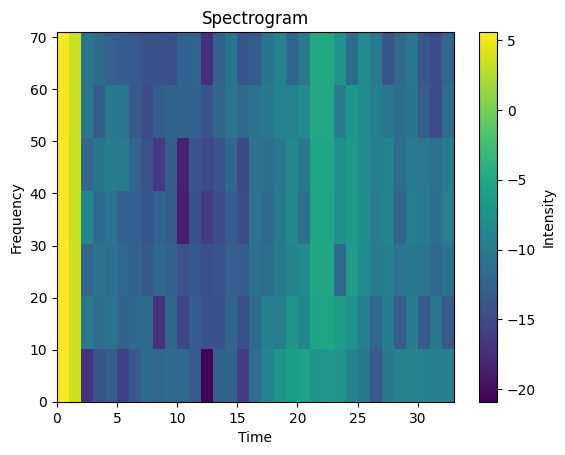

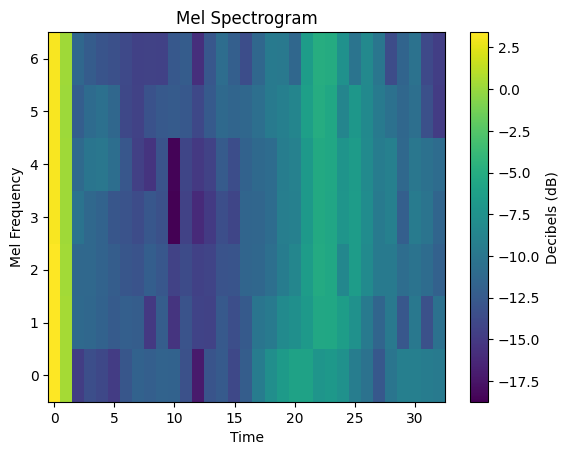

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/44_lennart_basilikum_142hz_1739278330323.0_15.wav--------------------------


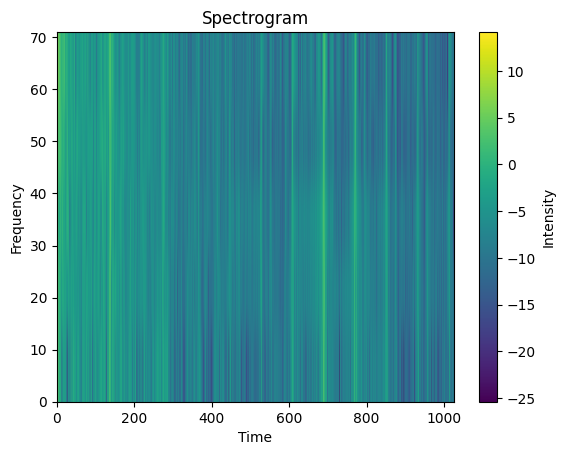

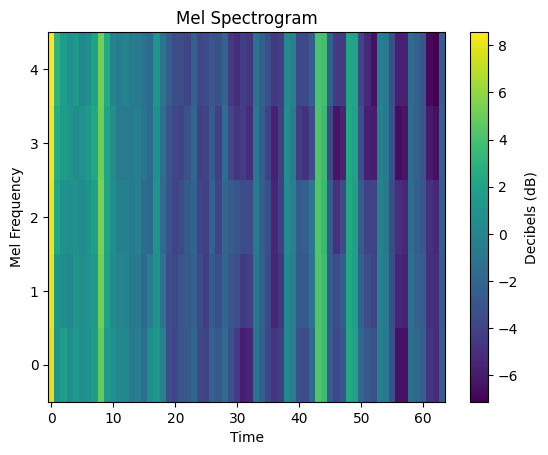

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/happy/13_johannes_basilikum_142hz_1738683414847.0_5.wav--------------------------


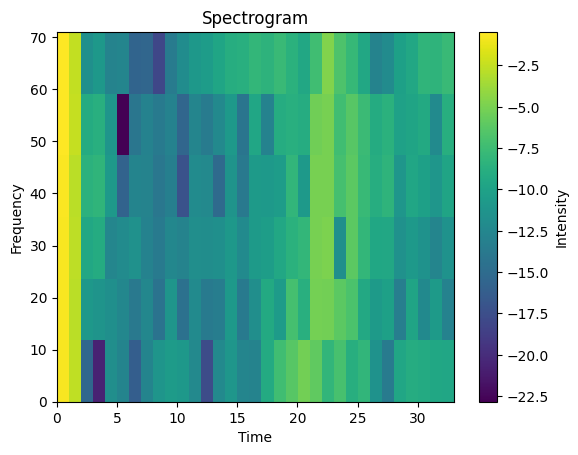

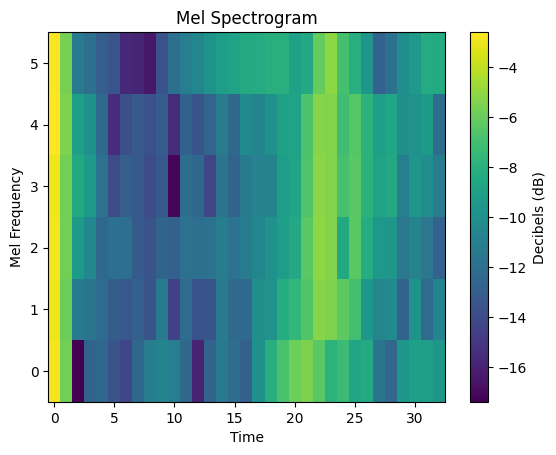

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/31_manuel_basilikum1_150hz_1738756756267.0_30.wav--------------------------


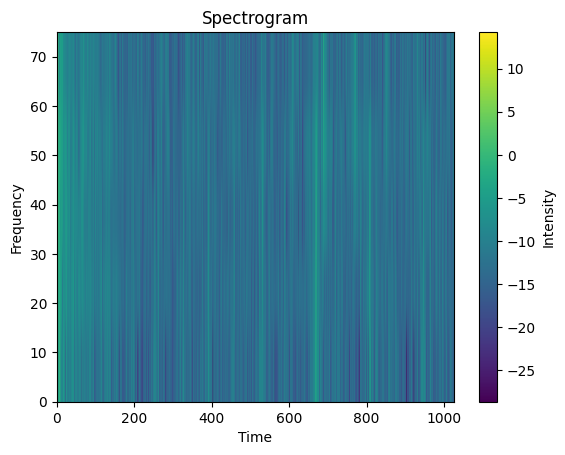

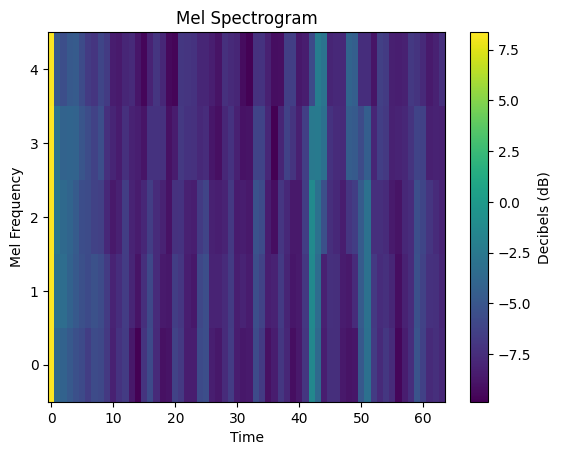

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/31_manuel_basilikum1_150hz_1738757135664.0_198.wav--------------------------


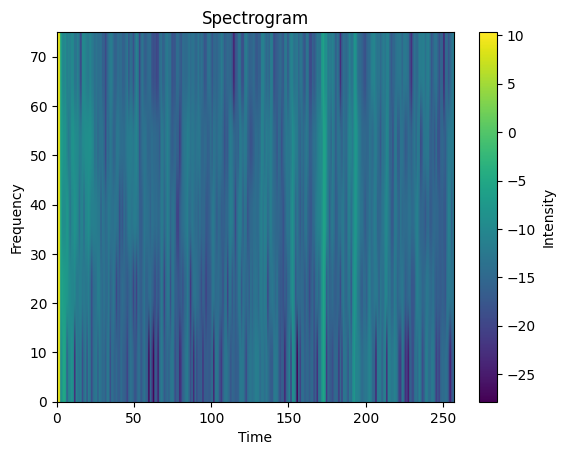

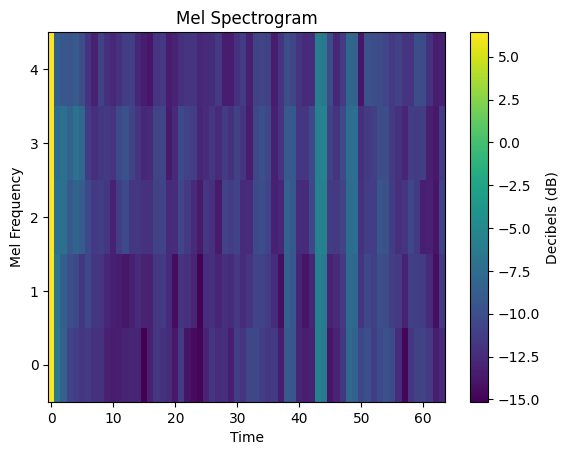

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/32_anna_basilikum1_142hz_1738757761076.0_42.wav--------------------------


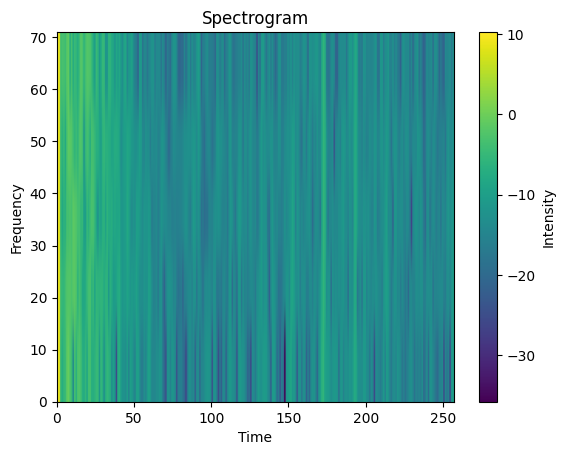

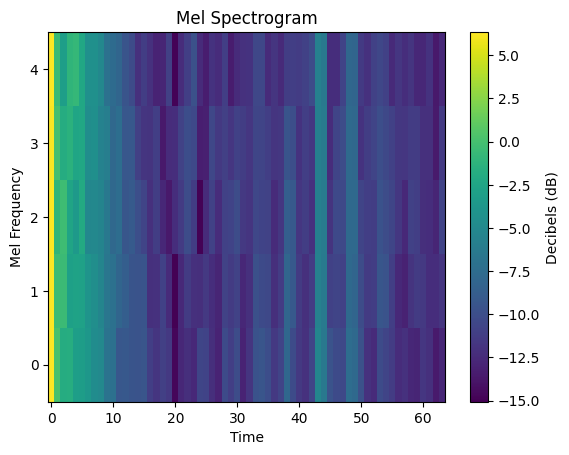

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/13_johannes_basilikum_142hz_1738683412749.0_2.wav--------------------------


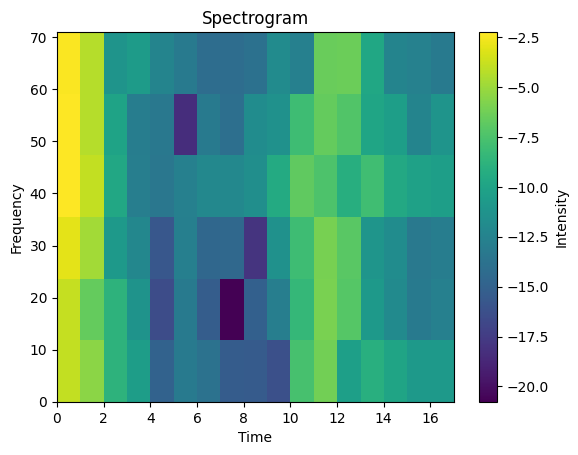

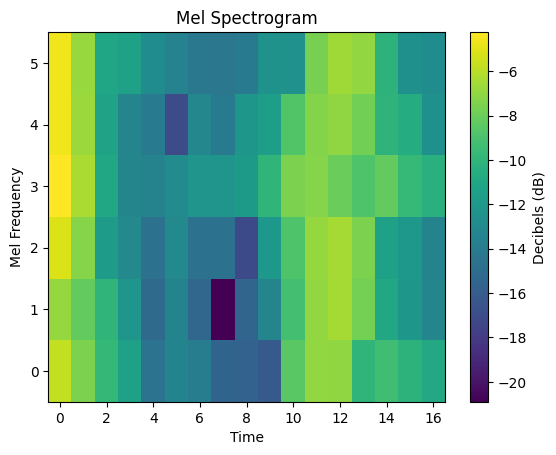

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/neutral/basilikum_142hz_1738520880850_6_0.wav--------------------------


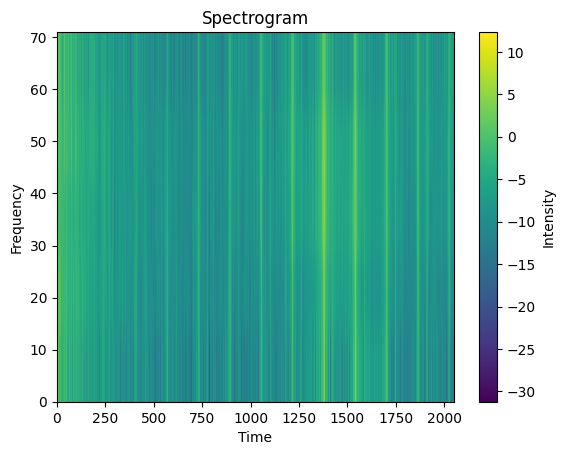

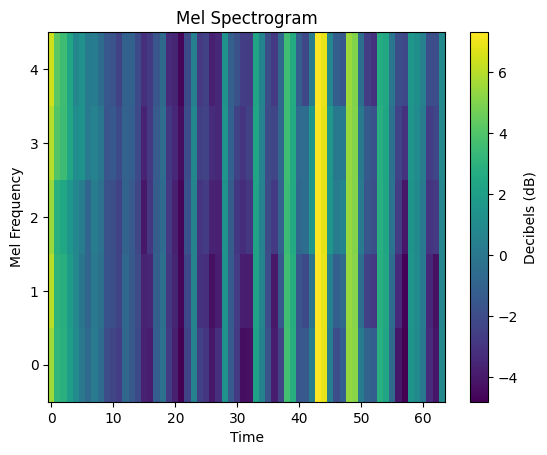

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/basilikum_142hz_1738520880850_6_131.wav--------------------------


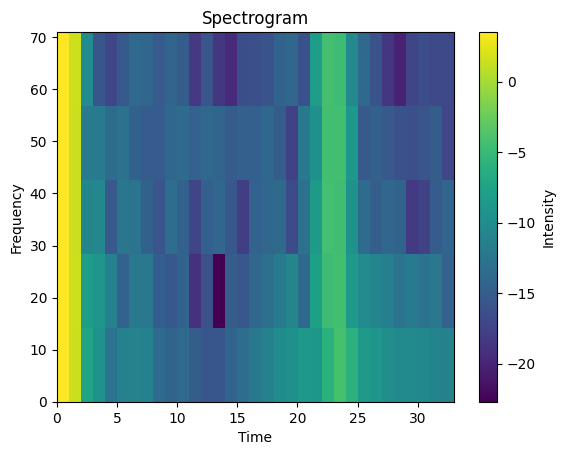

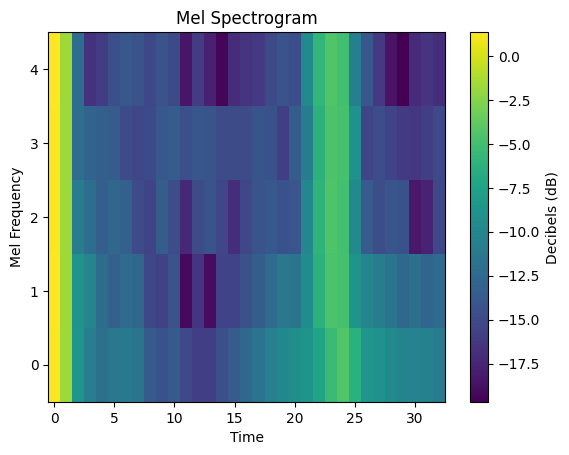

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/basilikum_142hz_1738520880850_6_74.wav--------------------------


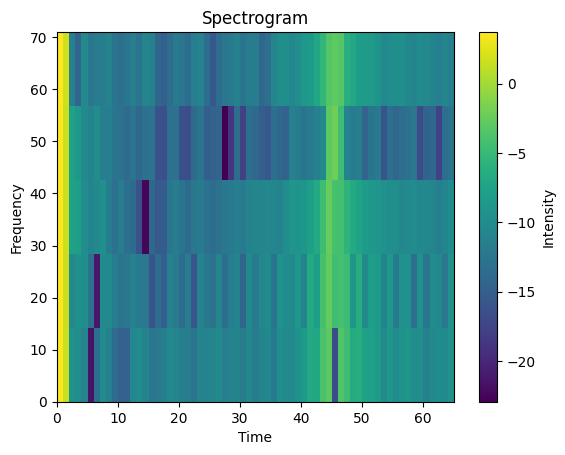

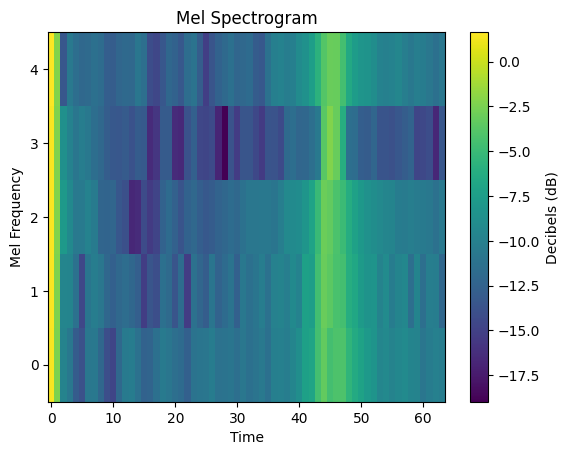

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/41_clemens_basilikum_142hz_1739275159840.0_7.wav--------------------------


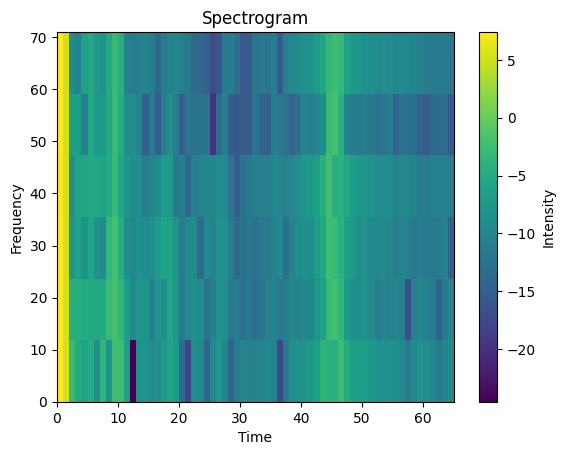

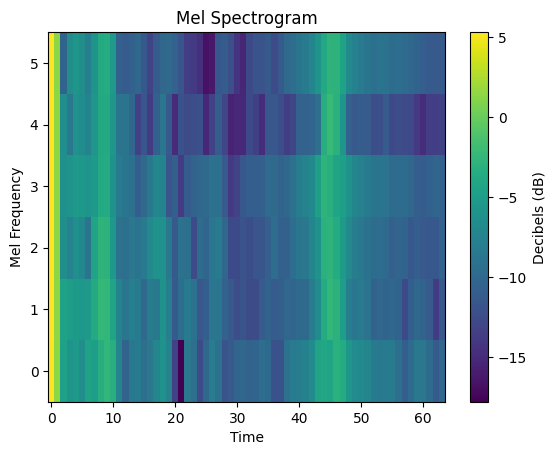

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/12_philipp_basilikum_142hz_1738682559393.0_8.wav--------------------------


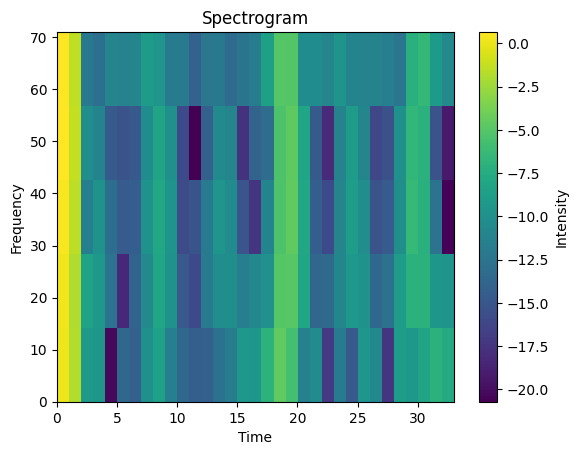

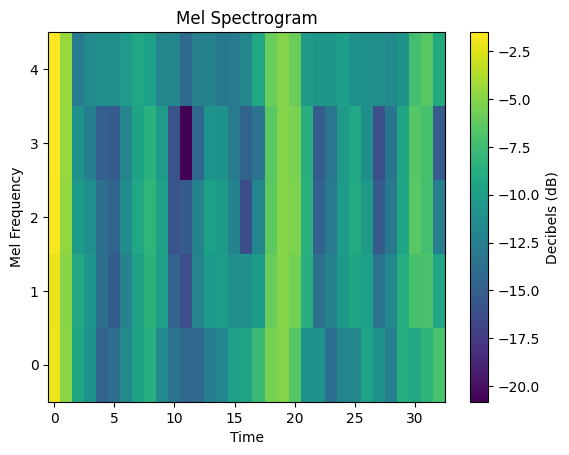

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/sad/47_johannes_basilikum_142hz_1739282789837.0_83.wav--------------------------


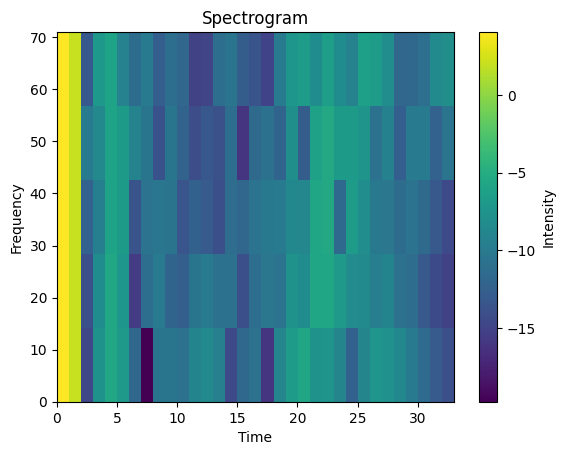

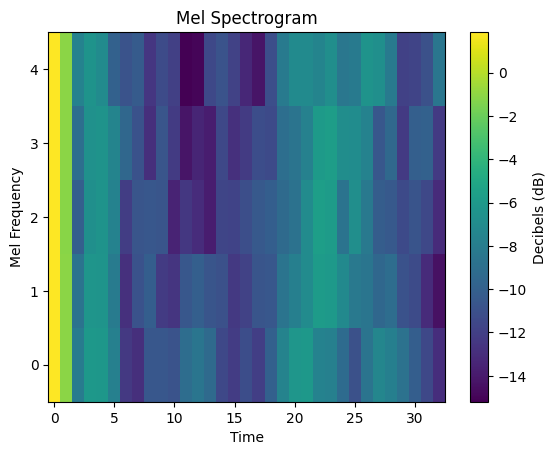

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/58_annika_basilikum_142hz_1739444845480.0_124.wav--------------------------


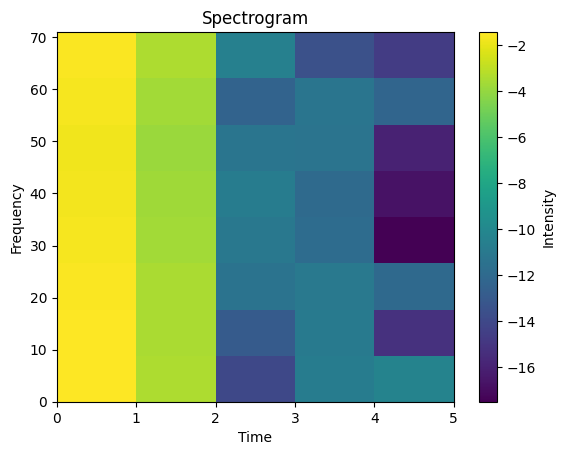

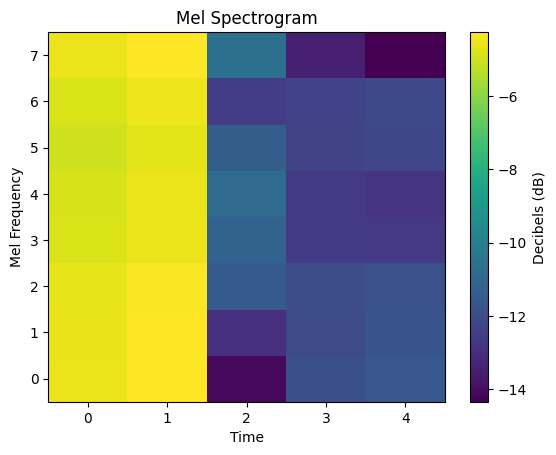

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/53_lars_basilikum_142hz_1739287770697.0_14.wav--------------------------


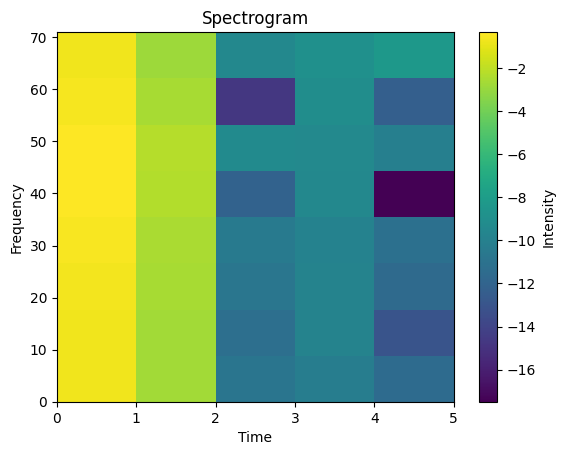

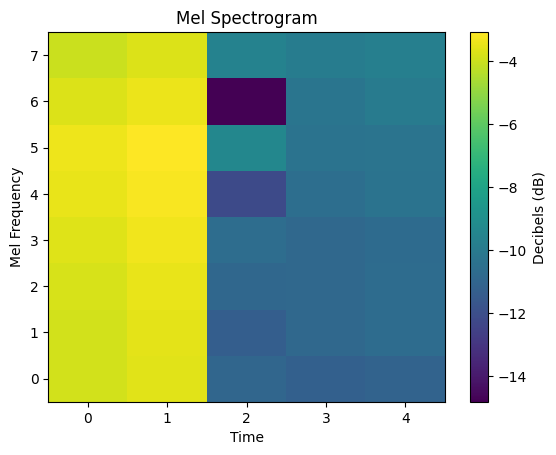

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/18_jannick_basilikum_142hz_1738689038718.0_21.wav--------------------------


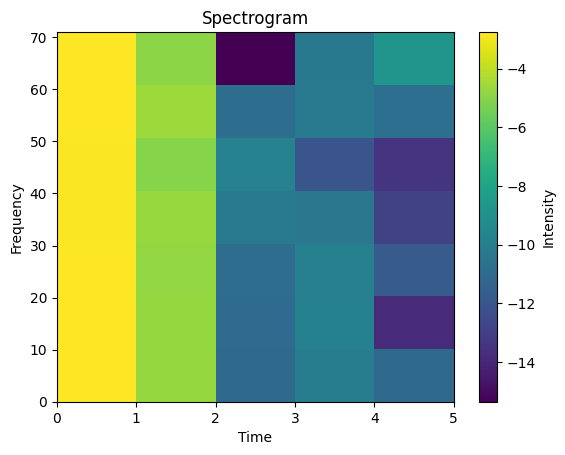

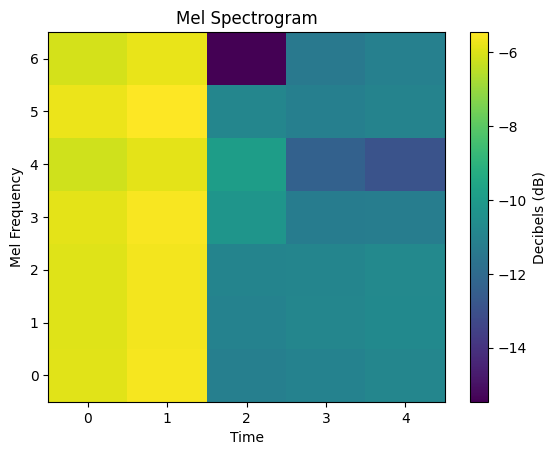

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/64_anna_basilikum_142hz_1739458007075.0_48.wav--------------------------


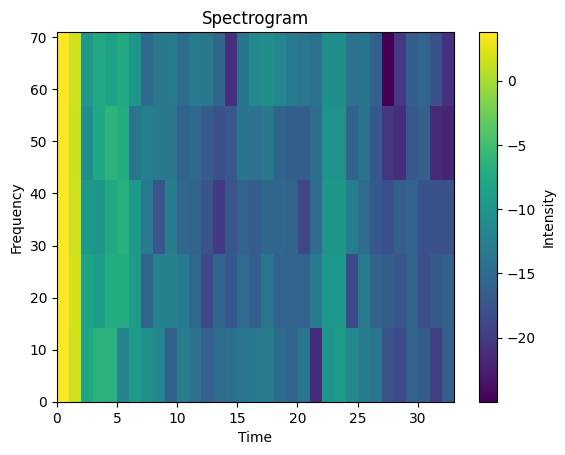

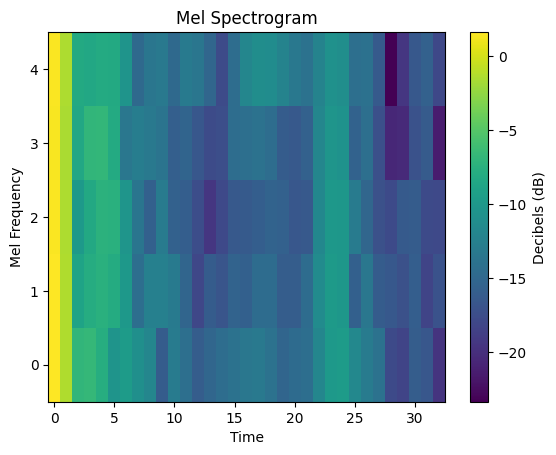

-------------------------/home/dlonghi1_jm/.data/petal/pre-labeled/audio/surprised/63_luisa_basilikum_142hz_1739456854264.0_5.wav--------------------------


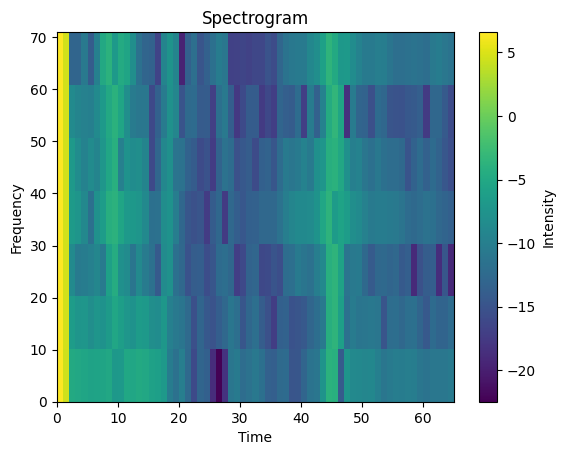

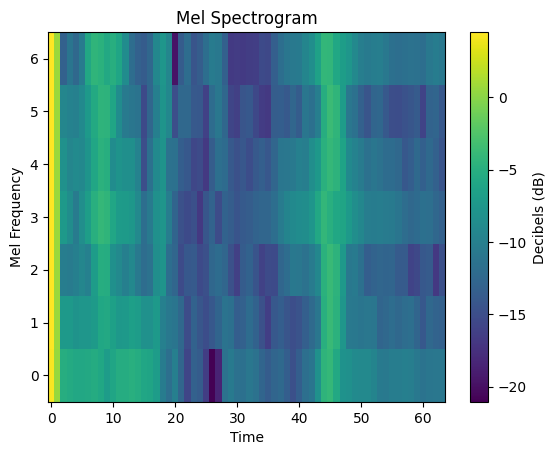

In [9]:
for file_path in file_paths:
    waveform, sample_rate = torchaudio.load(file_path)
    waveform = waveform + 1e-9

    print(f'-------------------------{file_path}--------------------------')

    spectrogram = create_spectrogram(waveform)
    n_fft = get_number_of_fourier_transform_bins(waveform)
    show_and_save_spectrogram_image(
        spectrogram=spectrogram,
        n_fft=n_fft,
        sample_rate=sample_rate,
        path=None
    )

    mel_spectrogram = create_mel_spectrogram(waveform, sample_rate)
    show_mel_spectrogram(
        mel_spectrogram=mel_spectrogram,
        n_fft=n_fft,
        sample_rate=sample_rate,
        path=None
    )
    